# Lasso Regression

### Lasso Regression is a type of linear regression that includes L1 regularization. It's used to prevent overfitting and handle multicollinearity (when predictors are highly correlated).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,RidgeCV,Lasso,LassoCV
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,LeaveOneOut

In [2]:
rng=np.random.default_rng(seed=42)
weight_array=np.array(rng.random(10))
height_array=np.array(rng.random(10))

In [3]:
x_train,x_test,y_train,y_test=train_test_split(weight_array,height_array,test_size=0.8,random_state=42)
print(f'x_train{x_train}')
print(f'x_test{x_test}')
print(f'y_train{y_train}')
print(f'y_test{y_test}')

x_train[0.69736803 0.7611397 ]
x_test[0.12811363 0.43887844 0.97562235 0.77395605 0.78606431 0.85859792
 0.45038594 0.09417735]
y_train[0.82276161 0.55458479]
y_test[0.82763117 0.92676499 0.22723872 0.37079802 0.06381726 0.64386512
 0.6316644  0.4434142 ]


In [4]:
# Linear Regression -> Sum of least Squared Residual
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
y_pred_linear=model.predict(x_test.reshape(-1,1))
print(f'Predicted Values {y_pred_linear}')

Predicted Values [ 3.21662758  1.90977901 -0.34737173  0.50068864  0.44977021  0.14474709
  1.86138692  3.35933867]


Text(0.5, 0.98, 'Linear Regression (Least Squared Method)')

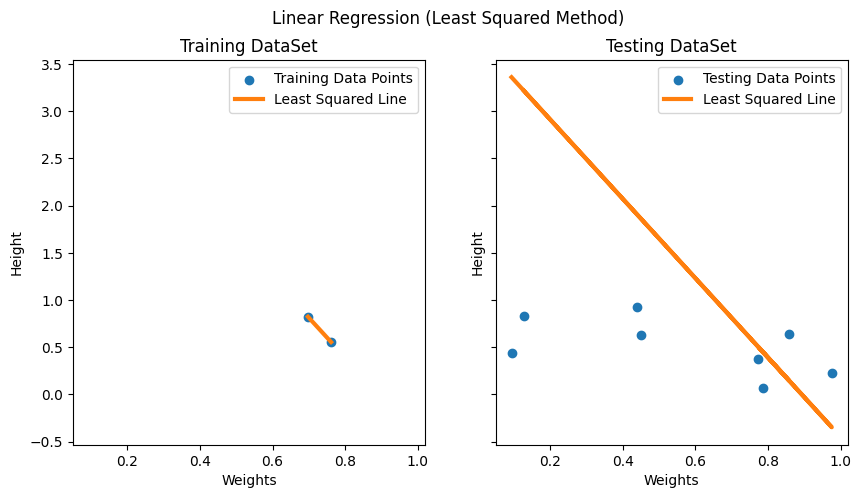

In [5]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5),sharex=True,sharey=True)

ax[0].scatter(x_train,y_train,label='Training Data Points')
ax[0].plot(x_train,model.predict(x_train.reshape(-1,1)),color='tab:orange',linewidth=3,label='Least Squared Line')
ax[0].set(xlabel='Weights',ylabel='Height',title='Training DataSet')
ax[0].legend()

ax[1].scatter(x_test,y_test,label='Testing Data Points')
ax[1].plot(x_test,y_pred_linear,color='tab:orange',linewidth=3,label='Least Squared Line')
ax[1].set(xlabel='Weights',ylabel='Height',title='Testing DataSet')
ax[1].legend()

fig.suptitle('Linear Regression (Least Squared Method)')

In [6]:
lasso=Lasso(alpha=1.0)
lasso.fit(x_train.reshape(-1,1),y_train)
y_pred_lasso=lasso.predict(x_test.reshape(-1,1))
print(f'Predicted Values = Least Squared Method + Absolute Value Penalty (L1 Norm) \n{y_pred_lasso}')

Predicted Values = Least Squared Method + Absolute Value Penalty (L1 Norm) 
[0.6886732 0.6886732 0.6886732 0.6886732 0.6886732 0.6886732 0.6886732
 0.6886732]


Text(0.5, 0.98, 'Linear Regression (Regularization:Lasso Regression)')

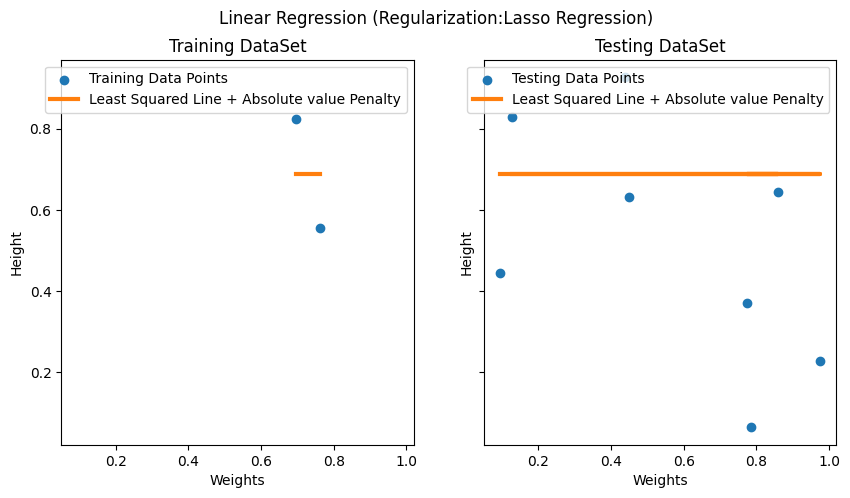

In [7]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5),sharex=True,sharey=True)

ax[0].scatter(x_train,y_train,label='Training Data Points')
ax[0].plot(x_train,lasso.predict(x_train.reshape(-1,1)),color='tab:orange',linewidth=3,label='Least Squared Line + Absolute value Penalty')
ax[0].set(xlabel='Weights',ylabel='Height',title='Training DataSet')
ax[0].legend()

ax[1].scatter(x_test,y_test,label='Testing Data Points')
ax[1].plot(x_test,y_pred_lasso,color='tab:orange',linewidth=3,label='Least Squared Line + Absolute value Penalty')
ax[1].set(xlabel='Weights',ylabel='Height',title='Testing DataSet')
ax[1].legend()

fig.suptitle('Linear Regression (Regularization:Lasso Regression)')

In [8]:
# Comparing both mean squared error
print(f'Mean Squared Error of Least Square Line -> {mean_squared_error(y_test,y_pred_linear):.2f}')
print(f'Mean Squared Error of Least Square Line + Absolute Value Penalty -> {mean_squared_error(y_test,y_pred_lasso):.2f}')

Mean Squared Error of Least Square Line -> 2.18
Mean Squared Error of Least Square Line + Absolute Value Penalty -> 0.11


##### As the data point are random so at the time of visulation it looks different but the minimum value for line is at lasso regression

### It is Similar for discrete data model , complex data model(mixture of discrete and coontinuous data) and logistic regression

### when lambda>0 -> lambda increases it can take slope=0

In [43]:
lambda_range=[0.0,1.0,10.0,20.0,40.0,60.0,100.0]
x_train,x_test,y_train,y_test=train_test_split(weight_array,height_array,test_size=0.60,random_state=42)
pred_lasso_dict_xtest={}
pred_lasso_dict_xtrain={}
residual_test=[]
slope_test=[]
for i in range(len(lambda_range)):
    lasso=Lasso(alpha=lambda_range[i])
    lasso.fit(x_train.reshape(-1,1),y_train)
    y_pred_lasso=lasso.predict(x_test.reshape(-1,1))
    key=f'lambda_{lambda_range[i]:.2f}'
    pred_lasso_dict_xtest[key]=y_pred_lasso
    pred_lasso_dict_xtrain[key]=lasso.predict(x_train.reshape(-1,1)) 
    ssr=np.sum((y_test-y_pred_lasso)**2)
    residual_test.append(ssr)
    slope_test.append(lasso.coef_)

C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.214e-02, tolerance: 7.652e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

In [10]:
print(f'Predicted Values In X_test \n{pred_lasso_dict_xtest}')
print(f'Predicted Values In X_train \n{pred_lasso_dict_xtrain}')

Predicted Values In X_test 
{'lambda_0.00': array([0.48534504, 0.59188804, 0.775906  , 0.70676647, 0.71091768,
       0.7357852 ]), 'lambda_1.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625]), 'lambda_10.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625]), 'lambda_20.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625]), 'lambda_40.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625]), 'lambda_60.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625]), 'lambda_100.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625, 0.61310625,
       0.61310625])}
Predicted Values In X_train 
{'lambda_0.00': array([0.59583328, 0.47371028, 0.68050894, 0.7023725 ]), 'lambda_1.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625]), 'lambda_10.00': array([0.61310625, 0.61310625, 0.61310625, 0.61310625]

In [11]:
df_train=pd.DataFrame(pred_lasso_dict_xtrain)
df_test=pd.DataFrame(pred_lasso_dict_xtest)
print('Training DataFrame Head\n',df_train.head())
print('Testing DataFrame Head\n',df_test.head())

Training DataFrame Head
    lambda_0.00  lambda_1.00  lambda_10.00  lambda_20.00  lambda_40.00  \
0     0.595833     0.613106      0.613106      0.613106      0.613106   
1     0.473710     0.613106      0.613106      0.613106      0.613106   
2     0.680509     0.613106      0.613106      0.613106      0.613106   
3     0.702372     0.613106      0.613106      0.613106      0.613106   

   lambda_60.00  lambda_100.00  
0      0.613106       0.613106  
1      0.613106       0.613106  
2      0.613106       0.613106  
3      0.613106       0.613106  
Testing DataFrame Head
    lambda_0.00  lambda_1.00  lambda_10.00  lambda_20.00  lambda_40.00  \
0     0.485345     0.613106      0.613106      0.613106      0.613106   
1     0.591888     0.613106      0.613106      0.613106      0.613106   
2     0.775906     0.613106      0.613106      0.613106      0.613106   
3     0.706766     0.613106      0.613106      0.613106      0.613106   
4     0.710918     0.613106      0.613106      0.613106

In [41]:
for col in df_test:
    print(df_test[col].values)


[0.48534504 0.59188804 0.775906   0.70676647 0.71091768 0.7357852 ]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]
[0.61310625 0.61310625 0.61310625 0.61310625 0.61310625 0.61310625]


In [35]:
for i in df_train.values:
    ssr=np.sum((y_test-i[0])**2)
    break
print(ssr)

0.6350969845805414


In [61]:
residual_test=np.array(residual_test)
slope_test=np.array(slope_test.ravel())
print(residual_test.shape)
print(slope_test.ravel().shape)

(7,)
(7,)


C:\Users\Rahul\AppData\Local\Temp\ipykernel_11436\2387494923.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_train,y=df_train[col].values,palette='rainbow',linewidth=2,label=f'lambda={lambda_range[i]}',ax=ax[0])
C:\Users\Rahul\AppData\Local\Temp\ipykernel_11436\2387494923.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_train,y=df_train[col].values,palette='rainbow',linewidth=2,label=f'lambda={lambda_range[i]}',ax=ax[0])
C:\Users\Rahul\AppData\Local\Temp\ipykernel_11436\2387494923.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_train,y=df_train[col].values,palette='rainbow',linewidth=2,label=f'lambda={lambda_range[i]}',ax=ax[0])
C:\Users\Rahul\AppData\Local\Temp\ipykernel_11436\2387494923.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_train,y=df_train[col].values,palette='r

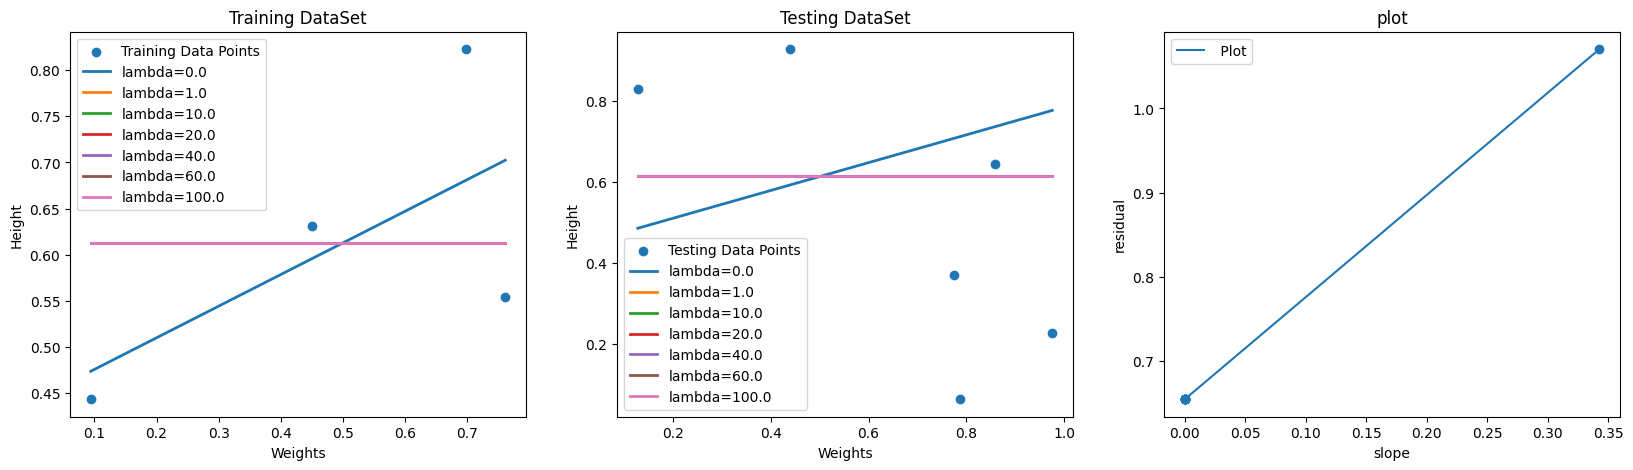

In [63]:
fig,ax=plt.subplots(ncols=3,figsize=(20,5))

# Ploting training data
i=0
ax[0].scatter(x_train,y_train,label='Training Data Points')
for col in df_train:
    sns.lineplot(x=x_train,y=df_train[col].values,palette='rainbow',linewidth=2,label=f'lambda={lambda_range[i]}',ax=ax[0])
    i+=1
ax[0].set(xlabel='Weights',ylabel='Height',title='Training DataSet')
ax[0].legend()

# ploting testing data
i=0
ax[1].scatter(x_test,y_test,label='Testing Data Points')
for col in df_test:
    sns.lineplot(x=x_test,y=df_test[col].values,palette='rainbow',linewidth=2,label=f'lambda={lambda_range[i]}',ax=ax[1])
    i+=1
ax[1].set(xlabel='Weights',ylabel='Height',title='Testing DataSet')
ax[1].legend()

sns.lineplot(x=slope_test,y=residual_test,palette='rainbow',label=' Plot',ax=ax[2])
ax[2].scatter(slope_test,residual_test)
ax[2].set(xlabel='slope',ylabel='residual',title='plot')
ax[2].legend()


In [25]:
lasso_check=Lasso(alpha=1.0).fit(x_train.reshape(-1,1),y_train)
y_pred=lasso_check.predict(x_test.reshape(-1,1))
ssr=np.sum((y_test-y_pred)**2)
print(ssr)

0.6546742785757078
